<a href="https://colab.research.google.com/github/samp3209/wineproject/blob/main/wine_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
df = pd.read_csv('wine - final (1).csv')

In [ ]:
#created the quantity column 
def extract_quantity(name):
    name = name.lower()
    if '1.5 l' in name or 'magnum' in name  or '1,5l' in name or '1.5l' in name or '1.5L' in name or '1.5,' in name or '1500ml' in name:
        return '1x1500 L'
    elif 'double magnum' in name or 'dmagnum' in name or '3 l' in name or '3l' in name or '3L' in name or '3.0l' in name or '(Double Magnum)' in name:
        return '1x3000 ml'
    elif 'magunm 6 pack' in name:
        return '6x1500 ml'
    elif '375ml' in name or '375 ml' in name or '1/2' in name:
        return '375 ml'
    elif '1.0l' in name or '1l' in name or '1 liter' in name:
        return '1x1000 ml'
    elif '(5L)' in name or '(5l)' in name or '5 liter' in name:
        return '1x5000 ml'
    elif '3-pack' in name or '3-bottle' in name or 'pack of 3' in name or 'case of 3' in name or '3 bottles' in name or '3 pack' in name or '3x75cl' in name:
        return '3x750 ml'
    elif 'pack of 4' in name or 'case of 4' in name or '4 bottles' in name or '4-bottle' in name or '4 pack' in name or '4x75cl' in name:
        return '4x750 ml'
    elif 'pack of 5' in name or 'case of 5' in name or '5 bottles' in name or '5-bottle' in name or '5 pack' in name or '5x75cl' in name:
        return '5x750 ml'
    elif '6-bottle' in name or 'case of 6' in name or 'pack of 6' in name or '6 bottles' in name or '6 x 75cl' in name or '6x75cl' in name or '6x750ml' in name or '6 pack' in name or '6x75cl' in name or '6 x 750ml' in name or '6-pack' in name:
        return '6x750 ml'
    elif 'pack of 7' in name or 'case of 7' in name or '7 bottles' in name or '7-bottle' in name or '7 pack' in name or '7x75cl' in name:
        return '7x750 ml'
    elif 'pack of 8' in name or 'case of 8' in name or '8 bottles' in name or '8-bottle' in name or '8 pack' in name or '8x75cl' in name:
        return '8x750 ml'
    elif 'pack of 10' in name or 'case of 10' in name or '10 bottles' in name or '10-bottle' in name or '10 pack' in name or '10x75cl' in name:
        return '10x750 ml'
    elif '12-bottle' in name or 'case of 12' in name or 'pack of 12' in name or '12 x 750 ml' in name or 'case-12' in name or '12 bottles' in name or '12 pack' in name or '12x75cl' in name or '12 x 75cl' in name:
        return '12x750 ml'
    elif '11-bottle' in name or 'case of 11' in name or 'pack of 11' in name or '11 x 750 ml' in name or 'case-11' in name or '11 bottles' in name or '11 pack' in name or '11x75cl' in name or '11 x 75cl' in name:
        return '12x750 ml'
    elif '2 bottles' in name or '2-bottle' in name or 'case of 2' in name or 'pack of 2' in name or '2 pack' in name or '2x75cl' in name:
        return '2x750ml'
    else:
        return '750 ml'

In [45]:
df.head(100)

,wine_names,year,price,region,country,quantity,pp750ml
0,"2020 Girolamo Russo Etna Rosso 'a Rina, Case of 8",2020.0,273.60,sicily,italy,8x750 ml,34.20
1,"2019 Morgado Do Quintao Algarve Branco, Case of 8",2019.0,253.04,algarve,port,8x750 ml,31.63
2,2019 Morgado Do Quintao Algarve Clarete Negra ...,2019.0,253.04,algarve,port,8x750 ml,31.63
3,"2020 Trimbach Classic Riesling, Case of 7",2020.0,255.15,alsace,france,7x750 ml,36.45
4,"2017 Trimbach Alsace Gewurztraminer, Case of 7",2017.0,274.05,alsace,france,7x750 ml,39.15
...,...,...,...,...,...,...,...
95,S.A. Huet - Vouvray Sec Le Haut-Lieu 2021,2021.0,37.98,loire,france,750 ml,37.98
96,"Occhipinti : SP68 Rosso 2021, Sicily, Sicilia,...",2021.0,36.99,sicily,italy,750 ml,36.99
97,Occhipinti Terre Sicilane SP68 Rosso 2021,2021.0,36.00,sicily,italy,750 ml,36.00
98,"Occhipinti SP68 Rosso 2021 / 750 ml., Italy, S...",2021.0,34.99,sicily,italy,750 ml,34.99


In [73]:
df['price'] = df['price'].astype('float')

In [43]:
df['quantity'].unique()

array(['750 ml', '1x1500 L', '1x5000 ml', '375 ml', '2x750ml', '6x750 ml',
       '4x750 ml', '1x1000 ml', '3x750 ml', '12x750 ml', '10x750 ml',
       '8x750 ml', '7x750 ml', '5x750 ml', '1x3000 ml'], dtype=object)

In [79]:
import plotly.express as px

fig = px.scatter(df, x="year", y="pp750ml", color="country", hover_name="wine_names", 
                 title="Wine Prices over Time")
fig.update_layout(yaxis_range=[0, 5500]) # set the y-axis range to remove outliers
fig.update_layout(xaxis_range=[1970, 2025]) # set the y-axis range to remove outliers

fig.show()

In [54]:
df.dtypes

wine_names     object
year          float64
price         float64
region         object
country        object
quantity       object
pp750ml       float64
dtype: object

In [55]:
fig = px.box(df, x="country", y="pp750ml", title="Wine Prices by Country")
fig.update_layout(yaxis_range=[0, 3500]) # set the y-axis range to remove outliers
fig.show()

<Axes: >

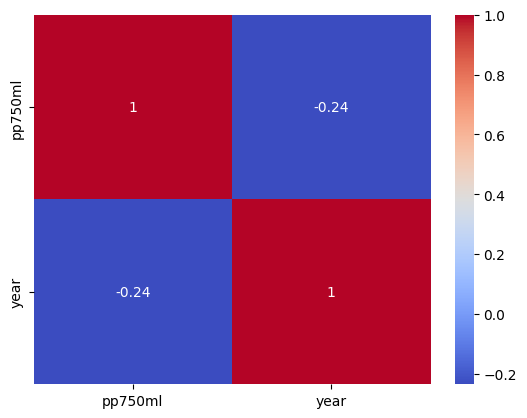

In [58]:
import seaborn as sns

# select the relevant columns and filter the data based on the y and x axis ranges
subset_df = df[(df['pp750ml'] < 3500) & (df['year'] >= 1990) & (df['year'] <= 2025)]
subset_df = subset_df[['pp750ml', 'year', 'region', 'country']]

# create a correlation matrix
corr_matrix = subset_df.corr()

# create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [60]:

# group the data by country and calculate summary statistics for price and year
country_stats = df.groupby('country').agg({'pp750ml': ['mean', 'min', 'max', 'std', 'median']})

# display the summary statistics for each country
print(country_stats)

             pp750ml                                         
                mean     min       max          std    median
country                                                      
cali      618.388756  30.000  13000.00  1225.231906  185.0000
france   1475.190048  16.950  59070.80  3952.187368  399.0000
germany   711.474148   4.495  21887.20  2102.989347  215.1600
italy     294.596446   5.000  18000.00   748.713850   74.9000
port      253.357454   4.160   7367.23   643.934654   73.9875


In [62]:
subsetcountry_stats = subset_df.groupby('country').agg({'pp750ml': ['mean', 'min', 'max', 'std', 'median']})
subsetcountry_stats

pp750ml                                      
               mean     min      max         std   median
country                                                  
cali     419.161324  30.000  3480.00  637.505378  175.000
france   629.908950  16.950  3499.00  748.576226  319.000
germany  401.223465   4.495  3487.92  535.424322  201.320
italy    231.123744   5.000  3210.00  452.991538   69.990
port     186.876833   4.160  2439.79  270.725196   64.795

no real difference between the subset now that we are looking at pp750ml


In [64]:
# group by year and calculate average price
df_year = df.groupby('year').mean().reset_index()

# create line plot using Plotly Express
fig = px.line(df_year, x='year', y='pp750ml', title='Average Wine Price by Year')
fig.show()

In [65]:
# group by year and calculate median price
df_year = df.groupby('year').median().reset_index()

# create line plot using Plotly Express
fig = px.line(df_year, x='year', y='pp750ml', title='Median Wine Price by Year')
fig.show()

In [9]:
#old quantity extraction
"""
import re
regexes = {
    '1.5 l': r'1\.5[ -]?l',
    '75cl': r'75[ -]?cl',
    'magnum': r'magnum',
    'double magnum': r'double[ -]?magnum|dmagnum',
    '3 l': r'3[ -]?l',
    '375 ml': r'375[ -]?ml',
    '.75 liter': r'\.75[ -]?l(iter)?|\.75[ -]?cl',
    '3-bottle': r'3[ -]?bottle',
    '2-bottle': r'2[ -]?bottle',
    '1.0l': r'1\.0[ -]?l',
    '6-bottle': r'6[ -]?bottle',
    '12-bottle': r'12[ -]?bottle',
    '1,5l': r'1,[ -]?5[ -]?l',
    '1l': r'1[ -]?l(iter)?|1[ -]?liter',
    '2 bottles': r'2[ -]?bottles?',
    '3 bottles': r'3[ -]?bottles?',
    '6 bottles': r'6[ -]?bottles?',
    'case of 3': r'case[ -]?of[ -]?3',
    'case of 2': r'case[ -]?of[ -]?2',
    'case of 6': r'case[ -]?of[ -]?6',
    'case of 12': r'case[ -]?of[ -]?12',
    'pack of 2': r'pack[ -]?of[ -]?2',
    'pack of 3': r'pack[ -]?of[ -]?3',
    'pack of 4': r'pack[ -]?of[ -]?4',
    'pack of 6': r'pack[ -]?of[ -]?6',
    'pack of 8': r'pack[ -]?of[ -]?8',
    'pack of 12': r'pack[ -]?of[ -]?12'
}

# define function to extract quantity/size from wine_names column
def get_quantity_size(wine_name):
    for size, regex in regexes.items():
        if re.search(regex, wine_name.lower()):
            return size
    return '750 ml'  # default to 750 ml if no size is found

# create new column for quantities/sizes
df['quantity_size'] = df['wine_names'].apply(get_quantity_size)

# check results
print(df['quantity_size'].head(100))"""


0     750 ml
1     750 ml
2     750 ml
3     750 ml
4     750 ml
       ...  
95    750 ml
96    750 ml
97    750 ml
98    750 ml
99    750 ml
Name: quantity_size, Length: 100, dtype: object


In [84]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Group the data by region and year, and calculate the mean of the price column for each group
result = df.groupby(['region', pd.Grouper(key='year', freq='Y')])['price'].mean()

# Print the result
print(result)

region       year      
Rheinhessen  2006-12-31    4321.735000
             2009-12-31    1389.094000
             2010-12-31    1332.860000
             2011-12-31    1145.253750
             2012-12-31    1037.746429
                              ...     
wurrtenberg  2017-12-31     131.760000
             2018-12-31      38.707857
             2019-12-31      47.171500
             2020-12-31      54.676400
             2021-12-31      80.651429
Name: price, Length: 580, dtype: float64


In [87]:
result.head(10)

region       year      
Rheinhessen  2006-12-31    4321.735000
             2009-12-31    1389.094000
             2010-12-31    1332.860000
             2011-12-31    1145.253750
             2012-12-31    1037.746429
             2013-12-31     801.552500
             2014-12-31     994.325238
             2015-12-31     862.938750
             2016-12-31    1064.963103
             2017-12-31     973.375385
Name: price, dtype: float64

In [89]:
print(df['region'].nunique())
print(df['country'].nunique())

19
5
